# Modelo de Regresión con keras

In [66]:
# Se importan las librerias a usar
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

## Acerca del conjunto de datos `concrete_data.csv`

El conjunto de datos trata sobre la resistencia a la compresión de diferentes muestras de hormigón en función de los volúmenes de los diferentes ingredientes que se utilizaron para fabricarlos. Los ingredientes incluyen:

- Cement: Volumen de cemento en la mezcla.
- Blast Furnace Slag: Volumen de escoria de alto horno en la mezcla.
- Fly Ash: Volumen de ceniza volante en la mezcla.
- Water: Volumen de agua en la mezcla.
- Superplasticizer: Volumen de superplastificante en la mezcla.
- Coarse Aggregate: Volumen de agregado grueso en la mezcla.
- Fine Aggregate: Volumen de agregado fino en la mezcla.
- Age: Edad de la muestra de hormigón en días.
- Strength: Resistencia a la compresión de la muestra en MPa.

In [67]:
# Se importa el archivo
df = pd.read_csv("concrete_data.csv")
# visualizamos el df
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Revisemos los datos

In [68]:
# Verificamos el tipo de dato en las columnas 
print(df.info())
# Contamos los valores duplicados
print(f'Verifica duplicados: ',df.duplicated().value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB
None
Verifica duplicados:  False    1005
True       25
Name: count, dtype: int64


Se identifican 25 filas duplicadas y cero valores nulos

In [69]:
# Generamos estadísticas descriptivas para todas las columnas, incluyendo datos de tipo objeto.
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


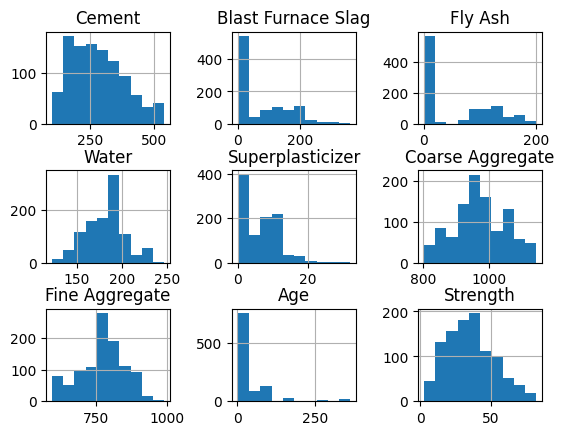

In [70]:
# Se grafican los histogramas
df.hist()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

Se identifica que los dato tienen diferentes escalas

In [71]:
# visualiza la correlacion entre las variables
df.drop(columns='Strength').corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000


Estas correlaciones nos dan una idea de cómo cada característica se relaciona con las demás en el conjunto de datos.

### Dividir datos en predictores y objetivos 
La variable objetivo en este problema es la resistencia de la muestra de concreto. 
Por lo tanto, nuestros predictores serán todas las demás columnas.

In [72]:
# Variables predictoras
predictors = df.drop(columns='Strength')
# Variable dependiente
target = df['Strength'].values

In [73]:
# Mostrar las primeras filas del DataFrame predictors
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [74]:
# Mostrar las primeras filas del DataFrame target
target

array([79.99, 61.89, 40.27, ..., 23.7 , 32.77, 32.4 ])

Normalizamos los datos usando  una  normalización estándar

In [75]:
predictors_norm = StandardScaler().fit_transform(predictors)
predictors_norm

array([[ 2.47791487, -0.85688789, -0.84714393, ...,  0.86315424,
        -1.21767004, -0.27973311],
       [ 2.47791487, -0.85688789, -0.84714393, ...,  1.05616419,
        -1.21767004, -0.27973311],
       [ 0.49142531,  0.79552649, -0.84714393, ..., -0.52651741,
        -2.24091709,  3.55306569],
       ...,
       [-1.27008832,  0.75957923,  0.85063487, ..., -1.03606368,
         0.0801067 , -0.27973311],
       [-1.16860982,  1.30806485, -0.84714393, ...,  0.21464081,
         0.19116644, -0.27973311],
       [-0.19403325,  0.30849909,  0.3769452 , ..., -1.39506219,
        -0.15074782, -0.27973311]])

### Construir una red neuronal 

In [76]:
# Guarda la cantidad de predictores ya que necesitaremos este número al construir nuestra red.
col_shape = predictors_norm.shape[1]

In [77]:
# Definen el modelo de regresion
def regression_model():
    # Crea el modelo
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(col_shape,) ))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    # Compila el codigo
    model.compile(optimizer='adam', loss='mean_squared_error')
    return  model

# Construimos el modelo
model = regression_model()

# Entenamos el modelo
model.fit(predictors_norm, target, 
           validation_split=0.3, 
           epochs=100, 
           verbose=2)

Epoch 1/100


c:\Users\Willc\OneDrive\Escritorio\William\Deep_learning_network\deep_learning-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 - 1s - 32ms/step - loss: 1629.0137 - val_loss: 1123.8668
Epoch 2/100
23/23 - 0s - 2ms/step - loss: 1469.8337 - val_loss: 980.1066
Epoch 3/100
23/23 - 0s - 2ms/step - loss: 1210.7635 - val_loss: 771.5665
Epoch 4/100
23/23 - 0s - 2ms/step - loss: 866.9254 - val_loss: 529.3057
Epoch 5/100
23/23 - 0s - 2ms/step - loss: 523.3226 - val_loss: 329.1845
Epoch 6/100
23/23 - 0s - 2ms/step - loss: 318.4365 - val_loss: 228.8492
Epoch 7/100
23/23 - 0s - 2ms/step - loss: 252.1430 - val_loss: 191.9919
Epoch 8/100
23/23 - 0s - 2ms/step - loss: 228.6870 - val_loss: 182.0166
Epoch 9/100
23/23 - 0s - 2ms/step - loss: 215.3047 - val_loss: 175.2740
Epoch 10/100
23/23 - 0s - 2ms/step - loss: 205.1186 - val_loss: 170.4918
Epoch 11/100
23/23 - 0s - 2ms/step - loss: 196.1663 - val_loss: 165.0432
Epoch 12/100
23/23 - 0s - 2ms/step - loss: 189.3269 - val_loss: 165.3167
Epoch 13/100
23/23 - 0s - 2ms/step - loss: 183.2048 - val_loss: 162.2817
Epoch 14/100
23/23 - 0s - 2ms/step - loss: 177.5419 - val_loss: 160

Observamos que la pérdida en el conjunto de datos de entrenamiento disminuyó con el tiempo, lo que indica que el modelo estaba aprendiendo de manera efectiva los patrones en los datos de entrenamiento. Sin embargo, la pérdida en el conjunto de datos de validación también disminuyó inicialmente pero luego comenzó a aumentar, lo que sugiere que el modelo podría estar sobreajustando los datos de entrenamiento y no generalizando bien a nuevos datos.

In [78]:
# Definen el modelo de regresion
def regression_model():
    # Crea el modelo
    model = Sequential()
    model.add(Dense(25, activation='relu', input_shape=(col_shape,) ))
    model.add(Dense(25, activation='relu' ))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    # Compila el codigo
    model.compile(optimizer='adam', loss='mean_squared_error')
    return  model

# Construimos el modelo
model = regression_model()

# Entenamos el modelo
model.fit(predictors_norm, target, 
           validation_split=0.3, 
           epochs=100, 
           verbose=2)

Epoch 1/100
23/23 - 1s - 37ms/step - loss: 1679.2534 - val_loss: 1185.9496
Epoch 2/100
23/23 - 0s - 2ms/step - loss: 1584.4695 - val_loss: 1096.6777
Epoch 3/100
23/23 - 0s - 2ms/step - loss: 1415.3729 - val_loss: 930.7215
Epoch 4/100
23/23 - 0s - 2ms/step - loss: 1107.1057 - val_loss: 655.2776
Epoch 5/100
23/23 - 0s - 2ms/step - loss: 677.2970 - val_loss: 330.1788
Epoch 6/100
23/23 - 0s - 2ms/step - loss: 336.5495 - val_loss: 191.1810
Epoch 7/100
23/23 - 0s - 2ms/step - loss: 261.5419 - val_loss: 174.4081
Epoch 8/100
23/23 - 0s - 2ms/step - loss: 230.3215 - val_loss: 166.6551
Epoch 9/100
23/23 - 0s - 2ms/step - loss: 212.1755 - val_loss: 163.1434
Epoch 10/100
23/23 - 0s - 2ms/step - loss: 199.1171 - val_loss: 162.1515
Epoch 11/100
23/23 - 0s - 3ms/step - loss: 190.4114 - val_loss: 159.5437
Epoch 12/100
23/23 - 0s - 3ms/step - loss: 183.8951 - val_loss: 159.6051
Epoch 13/100
23/23 - 0s - 2ms/step - loss: 178.4699 - val_loss: 156.4089
Epoch 14/100
23/23 - 0s - 3ms/step - loss: 174.4050 -

Durante el entrenamiento, observamos una disminución constante en la pérdida tanto en el conjunto de entrenamiento como en el de validación, lo que indica que el modelo está aprendiendo de manera efectiva y no está sobreajustando los datos. La pérdida final en el conjunto de validación fue de aproximadamente 139.58, lo que sugiere que el modelo tiene una buena capacidad de generalización.